In [2]:
#from midir import w1w2_condition
from tqdm import tqdm

import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import astropy
from astropy.io import fits
from astropy.table import Table
from astropy.time import Time
from astropy.timeseries import TimeSeries, aggregate_downsample
from astropy.coordinates import match_coordinates_sky as coords

from PIL import Image

import warnings
warnings.filterwarnings('ignore')

from mid_IR_variables import fileIO_processing as fp
from mid_IR_variables import lightcurve_processing as lp
from mid_IR_variables import ZTF_lightcurve_processing as zlp

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 22})
matplotlib.rc('font',**{'family':'serif','serif':['Times']})
matplotlib.rc('text', usetex=True)

SAVE_FILEPATH = 'C:/Users/paiaa/Documents/Research/Blanton Lab/Midir Variables/Figures/'
IMPORT_FILEPATH ='C:/Users/paiaa/Documents/Research/Blanton Lab/Midir Variables/'


In [3]:
mnsa_hdu, manga_wise_hdu, pipe3d_hdu = fp.import_manga(6, 1, 1)
mnsa, mwv, pipe3d = mnsa_hdu.data, manga_wise_hdu.data, pipe3d_hdu.data

crts1 = TimeSeries.read(IMPORT_FILEPATH + '/Lightcurves/CRTS/' + 'crts1.csv', format='csv', time_column='MJD', time_format='mjd')
crts2 = TimeSeries.read(IMPORT_FILEPATH + '/Lightcurves/CRTS/' + 'crts2.csv', format='csv', time_column='MJD', time_format='mjd')
crts = astropy.table.vstack([crts1, crts2])

ptf = TimeSeries.read(IMPORT_FILEPATH + '/Lightcurves/PTF/' + 'PTF_midir_variables.csv', format='csv', time_column='obsmjd', time_format='mjd')
#asassn = TimeSeries.read(IMPORT_FILEPATH + '/Lightcurves/ASAS-SN/' + asassn_name, format='csv', time_column='HJD', time_format='jd')

ztf = Table.read(IMPORT_FILEPATH + '/Lightcurves/ZTF/' + 'ztf_lc_key.tbl', format='ascii.ipac')
ztf_lc = fits.open(IMPORT_FILEPATH + '/Lightcurves/ZTF/' + 'lc.fits')[1].data


In [4]:
plateifuv = mwv[((mwv['var_flag'] == 1) & (mwv['plateifu'] != '8133-12702'))]['plateifu']
plateifuv[plateifuv=='11874-3702']

# plateifuv = np.array(['10222-12701', '10223-3701', '10498-6101', '11011-1902',
#             '11747-12703', '11838-12703', '11865-1901', '11940-12704',
#             '11943-6104', '11944-12704', '11974-3702', '12071-12702',
#             '12071-1901', '12073-3704', '12088-3701', '12089-6104',
#             '12511-12705', '8091-6101', '8260-9101', '8546-6103',
#             '8553-1901', '8593-12705', '8596-12702', '8598-9102',
#             '8612-1901', '8624-3702', '8713-9102', '8714-3704',
#             '8717-1902', '8723-6104', '8940-12702', '9000-1901',
#             '9046-1902', '9087-6101', '9090-3701', '9183-3703',
#             '9186-9101', '9193-12704', '9196-12703', '9487-9102',
#             '9497-12705', '9502-12703', '9503-12701', '9887-1901',
#             '9890-1901', '9892-12702'])

chararray([], dtype='<U12')

In [5]:

# pifu = '10216-12704'
# for i, pifu in enumerate(plateifuv[:1]):
#     print(str(i), pifu)
#     crts_obj = crts[crts['InputID'] == pifu]
#     # ptf_obj = ptf[ptf['plateifu_01'] == pifu]
#     asassn_obj = TimeSeries.read(IMPORT_FILEPATH + '/Lightcurves/ASAS-SN/' + pifu +'.csv', format='ascii', time_column='JD', time_format='jd')

#     ztf_oid = zlp.find_oid(pifu, ztf)
#     ztf_obj = zlp.find_lightcurve(ztf_oid, ztf_lc)

#     crts_obj_p = fp.process_crts(crts_obj, clip=2)
#     # ptf_obj_p = fp.process_ptf(ptf_obj, 2, clip=2)
#     asassn_obj_p = fp.process_asassn(asassn_obj, 'V', clip=2)
#     ztf_obj_p = fp.process_ztf(ztf_obj, filter='zg', clip=2)

#     wise_obj_p = fp.process_wise(pifu, mwv)


#     crts_a, crts_b, crts_c, crts_d = fp.bin_data(crts_obj_p, freq=20, bins=200)
#     crts_b = crts_b[~crts_b['mag'].mask]
#     crts_b['time'] = crts_b['time_bin_start']

#     asassn_a, asassn_b, asassn_c, asassn_d = fp.bin_data(asassn_obj_p, freq=20, bins=200)
#     asassn_b = asassn_b[~asassn_b['mag'].mask]
#     asassn_b['time'] = asassn_b['time_bin_start']


#     if crts_b['mag'].shape[0] > 0 and asassn_b['mag'].shape[0] > 0:
#         const1 = lp.match_lightcurves(crts_b, asassn_b)


#     ztf_a, ztf_b, ztf_c, ztf_d = fp.bin_data(ztf_obj_p, freq=20, bins=150)
#     ztf_b = ztf_b[~ztf_b['mag'].mask]
#     ztf_b['time'] = ztf_b['time_bin_start']

#     if asassn_b['mag'].shape[0] > 0 and ztf_b['mag'].shape[0] > 0:
#         asassn_b['mag'] += const1
#         const2 = lp.match_lightcurves(asassn_b, ztf_b)


#     asassn_obj_p['mag'] += const1
#     ztf_obj_p['mag'] += const2
#     combined_obj = astropy.table.vstack([crts_obj_p, asassn_obj_p, ztf_obj_p])
#     combined_obj.sort(['time'])
#     combined_obj_p = lp.local_nsigma_clipping(combined_obj, 2)

#     variances = np.array([])
#     freq = np.arange(10, 180, 10)

#     fig, ax = plt.subplots(figsize=(21, 6), ncols=3)
#     ax1, ax2, ax3 = ax
#     for f in freq:
#         combo_a, combo_b, combo_c, combo_d = fp.bin_data(combined_obj_p, freq=f, bins=2000)
#         combo_b = combo_b[~combo_b['mag'].mask]
#         combo_a = combo_a[~combo_a['mag'].mask]
#         combo_b['time'] = combo_b['time_bin_start']
#         combo_b = lp.local_nsigma_clipping(combo_b, 2)

#         ax2.plot(combo_a['time_bin_start'].to_value('decimalyear'), combo_a['mag'], alpha=0.7)

#         variances = np.append(variances, str(np.round(np.nanvar(combo_a['mag']), 3)) + '\n')

#     # wise_gp, log_likelihood_wise = GP(wise_obj_p, 5)
#     # wise_const = match_lightcurves(wise_obj_p, combined_obj_p)

#         combo_b_gp, log_likelihood_combo_b, hyper_params, rmse = lp.GP(combo_b, 4, (0.07,0.09))

#     ax1.errorbar(combined_obj_p['time'].to_value('decimalyear'), combined_obj_p['mag'], yerr=combined_obj_p['mag_err'], ls='none', capsize = 2, elineheight = 1.5,  linewidth = 1.5, 
#             color = 'grey', marker = 'o', mfc = 'grey', markersize = 4, markevery = 1, alpha=0.3, zorder=-1)
#     ax1.scatter(combined_obj_p['time'].to_value('decimalyear'), combined_obj_p['mag'], c='mediumseagreen', alpha=0.8, s=6, zorder=0) 

#     ax1.plot(combo_b_gp['time'].to_value('decimalyear'), combo_b_gp['mag'], c='blue', label='GP log likelihood: '+str(np.round(log_likelihood_combo_b, 2)), zorder=2)
#     ax1.fill_between(combo_b_gp['time'].to_value('decimalyear'), combo_b_gp['mag']-combo_b_gp['mag_err'], combo_b_gp['mag']+combo_b_gp['mag_err'], color='cornflowerblue', alpha=0.2, zorder=-1)
#     ax1.invert_yaxis()
    
#     heights = np.linspace(0.95, 0.05, freq.shape[0])
#     for k, f in enumerate(freq):
#         ax3.text(0.05, heights[k], str(f) + ' day epoch var: ' + variances[k]) 
#     ax3.set_axis_off()

In [6]:
# hyper_vector = np.array([])
# for i, key in enumerate(hyper_params.get_params()):
#     print(i, hyper_params.get_params()[key])
#     hyper_vector = np.append(hyper_vector, hyper_params.get_params()[key])

In [ ]:
gpnum = 3
lmin = 0.9
lmax = 1.1
for i, pifu in enumerate(plateifuv[:]):
    print(str(i)+':', pifu)
    # if pifu != '10498-6101':
    #     continue
    crts_obj = crts[crts['InputID'] == pifu]
    ptf_obj = ptf[ptf['plateifu_01'] == pifu]
    asassn_obj = TimeSeries.read(IMPORT_FILEPATH + '/Lightcurves/ASAS-SN/' + pifu +'.csv', format='ascii', time_column='JD', time_format='jd')
    
    ztf_oid = zlp.find_oid(pifu, ztf)
    ztf_obj = zlp.find_lightcurve(ztf_oid, ztf_lc)

    crts_obj_p = fp.process_crts(crts_obj, clip=2)
    ptf_obj_p = fp.process_ptf(ptf_obj, 2, clip=2)
    asassn_obj_p = fp.process_asassn(asassn_obj, 'V', clip=2)
    ztf_obj_p = fp.process_ztf(ztf_obj, filter='zg', clip=2)

    wise_obj_p = fp.process_wise(pifu, mwv)

    fig = plt.figure(figsize=(24, 24), constrained_layout=True)
    gs = fig.add_gridspec(2, 1, height_ratios=(2, 1))
    
    gs1 = gs[0].subgridspec(3, 3, height_ratios=(1, 2.5, 2.5))
   # gs2 = gs[1].subgridspec(1, 4)

    ax = fig.add_subplot(gs1[1, 0])
    ax2 = fig.add_subplot(gs1[1, 1])
    ax3 = fig.add_subplot(gs1[1, 2])
    ax4 = fig.add_subplot(gs1[0, 2])
    ax5 = fig.add_subplot(gs1[0, 0:3])
    ax6 = fig.add_subplot(gs1[2, 1])
    ax7 = fig.add_subplot(gs1[2, 2])
    
    ax.errorbar(crts_obj_p['time'].to_value('decimalyear'), crts_obj_p['mag'], yerr=crts_obj_p['mag_err'], ls='none', capsize = 2, elinewidth = 1.5,  linewidth = 1.5, 
            color = 'grey', marker = 'o', mfc = 'grey', markersize = 4, markevery = 1, alpha=0.3, zorder=2)
    ax.scatter(crts_obj_p['time'].to_value('decimalyear'), crts_obj_p['mag'], s=6, c='#21fc0d', zorder=2, label=str(crts_obj_p['mag'].shape[0]))
    
    


    if crts_obj_p['mag'].shape[0] > 0:
        crts_a, crts_b, crts_c, crts_d = fp.bin_data(crts_obj_p, freq=20, bins=200)
        crts_b = crts_b[~crts_b['mag'].mask]
        crts_b['time'] = crts_b['time_bin_start']

        ax.errorbar(crts_b['time'].to_value('decimalyear'), crts_b['mag'], yerr=crts_b['mag_err'], c='k', alpha=0.3, zorder=3)

    if asassn_obj_p['mag'].shape[0] > 0:
        
        asassn_a, asassn_b, asassn_c, asassn_d = fp.bin_data(asassn_obj_p, freq=20, bins=200)
        asassn_b = asassn_b[~asassn_b['mag'].mask]
        asassn_b['time'] = asassn_b['time_bin_start']

        
        if crts_b['mag'].shape[0] > 0 and asassn_b['mag'].shape[0] > 0:
            const1 = lp.match_lightcurves(crts_b, asassn_b)
        else:
            const1=0
        ax.errorbar(asassn_obj_p['time'].to_value('decimalyear'), asassn_obj_p['mag']+const1, yerr=asassn_obj_p['mag_err'], ls='none', capsize = 2, elinewidth = 1.5,  linewidth = 1.5, 
            color = 'grey', marker = 'o', mfc = 'grey', markersize = 4, markevery = 1, alpha=0.3, zorder=-1)
        ax.scatter(asassn_obj_p['time'].to_value('decimalyear'), asassn_obj_p['mag']+const1, s=6, c='fuchsia', zorder=2, label=str(asassn_obj_p['mag'].shape[0]))
        
        ax.errorbar(asassn_b['time'].to_value('decimalyear'), asassn_b['mag']+const1, yerr=asassn_b['mag_err'], c='k', alpha=0.3, zorder=3)
        
        asassn_b['mag'] += const1


    # if ptf_obj_p['mag'].shape[0] > 0:
    #     ptf_a, ptf_b, ptf_c, ptf_d = bin_data(ptf_obj_p, freq=20, bins=150)
    #     ptf_b = ptf_b[~ptf_b['mag'].mask]
    #     ptf_b['time'] = ptf_b['time_bin_start']
        
    #     if asassn_b['mag'].shape[0] > 0 and ptf_b['mag'].shape[0] > 0:
    #         const3 = np.nanmean(ptf_b['mag']) - np.nanmean(asassn_b['mag'])
    #     else:
    #         const3 = 0
    #     ax.errorbar(ptf_obj_p['time'].to_value('decimalyear'), ptf_obj_p['mag']-const3, yerr=ptf_obj_p['mag_err'], ls='none', capsize = 2, elinewidth = 1.5,  linewidth = 1.5, 
    #         color = 'grey', marker = 'o', mfc = 'grey', markersize = 4, markevery = 1, alpha=0.3, zorder=-1)
    #     ax.scatter(ptf_obj_p['time'].to_value('decimalyear'), ptf_obj_p['mag']-const3, s=6, c='blue', zorder=2, label=str(ptf_obj_p['mag'].shape[0]))
    
    #     ax.errorbar(ptf_b['time'].to_value('decimalyear'), ptf_b['mag']-const3, yerr=ptf_b['mag_err'], c='k', alpha=0.3, zorder=3)
        
    
    if ztf_obj_p['mag'].shape[0] > 0:
        
        ztf_a, ztf_b, ztf_c, ztf_d = fp.bin_data(ztf_obj_p, freq=20, bins=150)
        ztf_b = ztf_b[~ztf_b['mag'].mask]
        ztf_b['time'] = ztf_b['time_bin_start']
        
        if asassn_b['mag'].shape[0] > 0 and ztf_b['mag'].shape[0] > 0:
            const2 = lp.match_lightcurves(asassn_b, ztf_b)
        else:
            const2=0
        ax.errorbar(ztf_obj_p['time'].to_value('decimalyear'), ztf_obj_p['mag']+const2, yerr=ztf_obj_p['mag_err'], ls='none', capsize = 2, elinewidth = 1.5,  linewidth = 1.5, 
            color = 'grey', marker = 'o', mfc = 'grey', markersize = 4, markevery = 1, alpha=0.3, zorder=-1)
        ax.scatter(ztf_obj_p['time'].to_value('decimalyear'), ztf_obj_p['mag']+const2, s=6, c='r', zorder=2, label=str(ztf_obj_p['mag'].shape[0]))

        ax.errorbar(ztf_b['time'].to_value('decimalyear'), ztf_b['mag']+const2, yerr=ztf_b['mag_err'], c='k', alpha=0.3, zorder=3)
        

    ax.text(0.95, 0.97,  'CRTS', ha='right', va='top', c='#21fc0d', fontsize=16, transform=ax.transAxes, bbox=dict(facecolor='ivory', edgecolor='ivory', alpha=0.6), zorder=5)
    ax.text(0.95, 0.9,  'ASAS-SN', ha='right', va='top', c='fuchsia', fontsize=16, transform=ax.transAxes, bbox=dict(facecolor='ivory', edgecolor='ivory', alpha=0.6), zorder=5)
    ax.text(0.95, 0.83,  'ZTF', ha='right', va='top', c='r', fontsize=16, transform=ax.transAxes, bbox=dict(facecolor='ivory', edgecolor='ivory', alpha=0.6), zorder=5)
    #ax.text(0.95, 0.76,  'PTF', ha='right', va='top', c='blue', fontsize=16, transform=ax.transAxes, bbox=dict(facecolor='ivory', edgecolor='ivory', alpha=0.6), zorder=5)
   
    asassn_obj_p['mag'] += const1
    ztf_obj_p['mag'] += const2
    #ptf_obj_p['mag'] += const3
    
    combined_obj = astropy.table.vstack([crts_obj_p, asassn_obj_p, ztf_obj_p])
    combined_obj.sort(['time'])
    combined_obj_p = lp.local_nsigma_clipping(combined_obj, 2)
    combined_obj_p = combined_obj_p[20:-20]
    freq = 10
    combo_a, combo_b, combo_c, combo_d = fp.bin_data(combined_obj_p, freq=freq, bins=800)
    combo_b = combo_b[~combo_b['mag'].mask]
    
    combo_b['time'] = combo_b['time_bin_start']
    combo_b = lp.local_nsigma_clipping(combo_b, 2)

    wise_gp, log_likelihood_wise, hyperparams_wise, rmse_wise = lp.GP(wise_obj_p, 5, (1e-2, 5e3))
    #wise_const = match_lightcurves(wise_obj_p, combined_obj_p)


    ax2.errorbar(combined_obj_p['time'].to_value('decimalyear'), combined_obj_p['mag'], yerr=combined_obj_p['mag_err'], ls='none', capsize = 2, elinewidth = 1.5,  linewidth = 1.5, 
            color = 'grey', marker = 'o', mfc = 'grey', markersize = 4, markevery = 1, alpha=0.3, zorder=-1)
    ax2.scatter(combined_obj_p['time'].to_value('decimalyear'), combined_obj_p['mag'], c='mediumseagreen', alpha=0.6, s=6)    
    ax2.errorbar(combo_b['time'].to_value('decimalyear'), combo_b['mag'], yerr=combo_b['mag_err'], c='r', alpha=0.6, zorder=3, label='epoch size: '+ str(freq) + ' days')
    
    

    #combo_b_gp, log_likelihood_combo_b, hyperparams_combo_b, rmse_combo_b = lp.GP(combo_b, gpnum, (lmin, lmax))
   

    full_gp, log_likelihood_full, hyperparams_full, rmse_full = lp.GP(combined_obj_p, gpnum, (lmin, lmax))
    
    avg = lp.average_mag_around_specific_times(full_gp, combined_obj_p)
    diff1 = avg['mag'] - full_gp['mag']
    max_diff1 = np.nanmax(np.abs(diff1))
    rmse1= np.sqrt(np.mean(np.square(diff1)))
    
    poly_subtracted_obj_p, fit, fitted_poly = lp.polyfit_lightcurves(combined_obj_p, deg=10)
    poly_subtracted_gp, poly_subtracted_llh, poly_subtracted_hyper_params, poly_subtracted_rmse = lp.GP(poly_subtracted_obj_p, gpnum, (lmin, lmax))
    gp_fitted_poly =lp.make_polynomial(poly_subtracted_gp, fit)

    diff2 = poly_subtracted_gp['mag'] + gp_fitted_poly - full_gp['mag']
    max_diff2 = np.nanmax(np.abs(diff2))
    rmse2= np.sqrt(np.mean(np.square(diff2)))
    # diff = combo_b_gp['mag'] - full_gp['mag']
    # rmse_post_clip = np.sqrt(np.mean(np.square(diff)))

    ax3.errorbar(combined_obj_p['time'].to_value('decimalyear'), combined_obj_p['mag'], yerr=combined_obj_p['mag_err'], ls='none', capsize = 2, elinewidth = 1.5,  linewidth = 1.5, 
            color = 'grey', marker = 'o', mfc = 'grey', markersize = 4, markevery = 1, alpha=0.3, zorder=-1)
    ax3.scatter(combined_obj_p['time'].to_value('decimalyear'), combined_obj_p['mag'], c='mediumseagreen', alpha=0.8, s=6, zorder=0) 

    ax3.plot(full_gp['time'].to_value('decimalyear'), full_gp['mag'], c='blue', label='GP log likelihood: '+str(np.round(log_likelihood_full, 2)), zorder=2)
    ax3.fill_between(full_gp['time'].to_value('decimalyear'), full_gp['mag']-full_gp['mag_err'], full_gp['mag']+full_gp['mag_err'], color='cornflowerblue', alpha=0.2, zorder=-1)
    
    
    ax4.sharex(ax3)
    ax4.errorbar(wise_obj_p['time'].to_value('decimalyear'), wise_obj_p['mag'], yerr=wise_obj_p['mag_err'], ls='none', capsize = 2, elinewidth = 1.5,  linewidth = 1.5, 
                color = 'maroon', marker = 'o', mfc = 'r', markersize = 4, markevery = 1, alpha=0.6, zorder=4)
    ax4.plot(wise_gp['time'].to_value('decimalyear'), wise_gp['mag'], c='r', label='GP log likelihood: '+str(np.round(log_likelihood_wise, 2)))
    ax4.fill_between(wise_gp['time'].to_value('decimalyear'), wise_gp['mag']-wise_gp['mag_err'], wise_gp['mag']+wise_gp['mag_err'], color='fuchsia', alpha=0.3)

    
    
    ax5.text(0.05, 0.8,  'full GP Kernel= ' + str(hyperparams_full), ha='left', va='top', fontsize=25, transform=ax5.transAxes, bbox=dict(facecolor='ivory', edgecolor='ivory', alpha=0.6), zorder=5)
    #ax5.text(0.05, 0.6,  'binned GP Kernel= ' + str(hyperparams_combo_b), ha='left', va='top', fontsize=25, transform=ax5.transAxes, bbox=dict(facecolor='ivory', edgecolor='ivory', alpha=0.6), zorder=5)
    ax5.text(0.05, 0.6,  'poly subtracted Kernel= ' + str(poly_subtracted_hyper_params), ha='left', va='top', fontsize=25, transform=ax5.transAxes, bbox=dict(facecolor='ivory', edgecolor='ivory', alpha=0.6), zorder=5)
    ax5.text(0.05, 0.2,  'RMSE (between full \& averaged)= ' + str(np.round(rmse1, 3)) + ';  ' + 'RMSE (between full \& poly)= ' + str(np.round(rmse2, 3)), ha='left', va='top', fontsize=25, transform=ax5.transAxes, bbox=dict(facecolor='ivory', edgecolor='ivory', alpha=0.6), zorder=5)
    ax5.text(0.05, 0.02,  'max diff (between full \& averaged)= ' + str(np.round(max_diff1, 3)) + ';  ' + 'max diff (between full \& poly)= ' + str(np.round(max_diff2, 3)), ha='left', va='top', fontsize=25, transform=ax5.transAxes, bbox=dict(facecolor='ivory', edgecolor='ivory', alpha=0.6), zorder=5)

    ax5.set_axis_off()


    ax6.sharex(ax3)
    # ax6.errorbar(combined_obj_p['time'].to_value('decimalyear'), combined_obj_p['mag'], yerr=combined_obj_p['mag_err'], ls='none', capsize = 2, elinewidth = 1.5,  linewidth = 1.5, 
    #         color = 'grey', marker = 'o', mfc = 'grey', markersize = 4, markevery = 1, alpha=0.3, zorder=-1)
    # ax6.scatter(combined_obj_p['time'].to_value('decimalyear'), combined_obj_p['mag'], c='mediumseagreen', alpha=0.8, s=6, zorder=0) 

    ax6.plot(full_gp['time'].to_value('decimalyear'), full_gp['mag'], marker='o', c='blue', zorder=-1)
    ax6.errorbar(avg['time'].to_value('decimalyear'), avg['mag'], yerr=avg['mag_err'], ls='none', capsize=2, marker='D', markersize=5, c='r', alpha=0.6)
    #ax6.fill_between(combo_b_gp['time'].to_value('decimalyear'), combo_b_gp['mag']-combo_b_gp['mag_err'], combo_b_gp['mag']+combo_b_gp['mag_err'], color='cornflowerblue', alpha=0.2, zorder=-1)
    #ax6.errorbar(combo_b['time'].to_value('decimalyear'), combo_b['mag'], yerr=combo_b['mag_err'], c='green', alpha=0.6, zorder=0, label='epoch size: '+ str(freq) + ' days')
    
    ax7.errorbar(combined_obj_p['time'].to_value('decimalyear'), combined_obj_p['mag'], yerr=combined_obj_p['mag_err'], ls='none', capsize = 2, elinewidth = 1.5,  linewidth = 1.5, 
            color = 'grey', marker = 'o', mfc = 'grey', markersize = 4, markevery = 1, alpha=0.3, zorder=-1)
    ax7.scatter(combined_obj_p['time'].to_value('decimalyear'), combined_obj_p['mag'], c='mediumseagreen', alpha=0.8, s=6, zorder=0) 
    ax7.plot(combined_obj_p['time'].to_value('decimalyear'), fitted_poly, c='r')
    ax7.plot(poly_subtracted_gp['time'].to_value('decimalyear'), poly_subtracted_gp['mag']+gp_fitted_poly, c='blue', label='GP log likelihood: '+str(np.round(poly_subtracted_llh, 2)), zorder=2)
    ax7.fill_between(poly_subtracted_gp['time'].to_value('decimalyear'), poly_subtracted_gp['mag']+gp_fitted_poly-poly_subtracted_gp['mag_err'], poly_subtracted_gp['mag']+gp_fitted_poly+poly_subtracted_gp['mag_err'], color='cornflowerblue', alpha=0.2, zorder=-1)

    ax.set_xticks([2005, 2010, 2015, 2020, 2025], [2005, 2010, 2015, 2020, 2025])
    ax.invert_yaxis()
    fig.suptitle(r'\textit{'+pifu+'}')
    ax.legend(loc='lower left', fontsize=20)
    ax.set_ylabel('mag')    
    ax.set_xlabel('date')

    ax2.invert_yaxis()
    ax2.legend(loc='lower left', fontsize=20)
    #ax2.set_ylabel('mag')    
    ax2.set_xlabel('date')
    #ax2.yaxis.set_ticklabels([])
    ax2.set_xticks([2005, 2010, 2015, 2020, 2025], [2005, 2010, 2015, 2020, 2025])

    ax3.set_ylim(combined_obj_p['mag'].min()-0.1, combined_obj_p['mag'].max()+0.1)
    ax3.invert_yaxis()
    ax3.legend(loc='lower left', fontsize=20)
    #ax3.set_ylabel('mag')    
    ax3.set_xlabel('date')
    #ax3.yaxis.set_ticklabels([])
    ax3.set_xticks([2005, 2010, 2015, 2020, 2025], [2005, 2010, 2015, 2020, 2025])
    
    ax4.invert_yaxis()
    ax4.legend(loc='lower left', fontsize=20)
    ax4.set_ylabel('mag')
    #ax4.set_xticks([2005, 2010, 2015, 2020, 2025], ['', '', '', '', ''])

    ax6.set_ylim(avg['mag'].min()-0.05, avg['mag'].max()+0.05)
    ax6.invert_yaxis()
    #ax6.legend(loc='lower left', fontsize=20)
    ax6.set_ylabel('mag')    
    ax6.set_xlabel('date')
    #ax3.yaxis.set_ticklabels([])
    ax6.set_xticks([2005, 2010, 2015, 2020, 2025], [2005, 2010, 2015, 2020, 2025])

    ax7.set_ylim(combined_obj_p['mag'].min()-0.1, combined_obj_p['mag'].max()+0.1)
    ax7.invert_yaxis()
    ax7.legend(loc='lower left', fontsize=20)
    #ax3.set_ylabel('mag')    
    ax7.set_xlabel('date')
    #ax3.yaxis.set_ticklabels([])
    ax7.set_xticks([2005, 2010, 2015, 2020, 2025], [2005, 2010, 2015, 2020, 2025])
    
    plt.subplots_adjust(wspace=0, hspace=0)

    # gp_names = np.array(['exp', 'matern', 'sine', 'RBF'])
    # for j in range(0,4):
    #     ax01 = fig.add_subplot(gs2[0, j])
    #     gp, gp_llh = lp.GP(combo_b, j)

    #     ax01.errorbar(combined_obj_p['time'].to_value('decimalyear'), combined_obj_p['mag'], yerr=combined_obj_p['mag_err'], ls='none', capsize = 2, elinewidth = 1.5,  linewidth = 1.5, 
    #         color = 'grey', marker = 'o', mfc = 'grey', markersize = 4, markevery = 1, alpha=0.3, zorder=-1)
    #     ax01.scatter(combined_obj_p['time'].to_value('decimalyear'), combined_obj_p['mag'], c='mediumseagreen', alpha=0.6, s=6) 

    #     ax01.plot(gp['time'].to_value('decimalyear'), gp['mag'], c='blue', label=gp_names[j] +' llh: '+str(np.round(gp_llh, 2)))
    #     ax01.fill_between(gp['time'].to_value('decimalyear'), gp['mag']-gp['mag_err'], gp['mag']+gp['mag_err'], color='cornflowerblue', alpha=0.4)

    #     ax01.set_xticks([2005, 2010, 2015, 2020, 2025], [2005, 2010, 2015, 2020, 2025])
    #     ax01.invert_yaxis()
    #     ax01.legend(loc='lower left', fontsize=20)
    #     if j == 0:
    #         ax01.set_ylabel('mag')    
    #     ax01.set_xlabel('date')
    plt.savefig(SAVE_FILEPATH+'GP_poly2/'+pifu+'.png', bbox_inches = 'tight', pad_inches = 0.1, dpi = 300)

In [5]:
gpnum = 3
lmin = np.array([0.495, 0.95])
lmax = np.array([0.505, 1.05])

for i, pifu in enumerate(plateifuv[:]):
    print(str(i)+':', pifu)
    # if pifu != '10498-6101':
    #     continue
    crts_obj = crts[crts['InputID'] == pifu]
    ptf_obj = ptf[ptf['plateifu_01'] == pifu]
    asassn_obj = TimeSeries.read(IMPORT_FILEPATH + '/Lightcurves/ASAS-SN/' + pifu +'.csv', format='ascii', time_column='JD', time_format='jd')
    
    ztf_oid = zlp.find_oid(pifu, ztf)
    ztf_obj = zlp.find_lightcurve(ztf_oid, ztf_lc)

    crts_obj_p = fp.process_crts(crts_obj, clip=2)
    ptf_obj_p = fp.process_ptf(ptf_obj, 2, clip=2)
    asassn_obj_p = fp.process_asassn(asassn_obj, 'V', clip=2)
    ztf_obj_p = fp.process_ztf(ztf_obj, filter='zg', clip=2)

    wise_obj_p = fp.process_wise(pifu, mwv)

    fig = plt.figure(figsize=(24, 24), constrained_layout=True)
    gs = fig.add_gridspec(2, 1, height_ratios=(2, 1))
    
    gs1 = gs[0].subgridspec(3, 3, height_ratios=(1, 2.5, 2.5))
   # gs2 = gs[1].subgridspec(1, 4)

    ax1 = fig.add_subplot(gs1[1, 0])
    ax2 = fig.add_subplot(gs1[1, 1])
    ax3 = fig.add_subplot(gs1[1, 2])
    ax4 = fig.add_subplot(gs1[0, 2])
    ax5 = fig.add_subplot(gs1[0, 0:3])
    ax6 = fig.add_subplot(gs1[2, 1])
    ax7 = fig.add_subplot(gs1[2, 2])
    
    ax1.errorbar(crts_obj_p['time'].to_value('decimalyear'), crts_obj_p['mag'], yerr=crts_obj_p['mag_err'], ls='none', capsize = 2, elinewidth = 1.5,  linewidth = 1.5, 
            color = 'grey', marker = 'o', mfc = 'grey', markersize = 4, markevery = 1, alpha=0.3, zorder=2)
    ax1.scatter(crts_obj_p['time'].to_value('decimalyear'), crts_obj_p['mag'], s=6, c='#21fc0d', zorder=2, label=str(crts_obj_p['mag'].shape[0]))
    
    


    if crts_obj_p['mag'].shape[0] > 0:
        crts_a, crts_b, crts_c, crts_d = fp.bin_data(crts_obj_p, freq=20, bins=200)
        crts_b = crts_b[~crts_b['mag'].mask]
        crts_b['time'] = crts_b['time_bin_start']

        ax1.errorbar(crts_b['time'].to_value('decimalyear'), crts_b['mag'], yerr=crts_b['mag_err'], c='k', alpha=0.3, zorder=3)

    if asassn_obj_p['mag'].shape[0] > 0:
        
        asassn_a, asassn_b, asassn_c, asassn_d = fp.bin_data(asassn_obj_p, freq=20, bins=200)
        asassn_b = asassn_b[~asassn_b['mag'].mask]
        asassn_b['time'] = asassn_b['time_bin_start']

        
        if crts_b['mag'].shape[0] > 0 and asassn_b['mag'].shape[0] > 0:
            const1 = lp.match_lightcurves(crts_b, asassn_b)
        else:
            const1=0
        ax1.errorbar(asassn_obj_p['time'].to_value('decimalyear'), asassn_obj_p['mag']+const1, yerr=asassn_obj_p['mag_err'], ls='none', capsize = 2, elinewidth = 1.5,  linewidth = 1.5, 
            color = 'grey', marker = 'o', mfc = 'grey', markersize = 4, markevery = 1, alpha=0.3, zorder=-1)
        ax1.scatter(asassn_obj_p['time'].to_value('decimalyear'), asassn_obj_p['mag']+const1, s=6, c='fuchsia', zorder=2, label=str(asassn_obj_p['mag'].shape[0]))
        
        ax1.errorbar(asassn_b['time'].to_value('decimalyear'), asassn_b['mag']+const1, yerr=asassn_b['mag_err'], c='k', alpha=0.3, zorder=3)
        
        asassn_b['mag'] += const1
    
    if ztf_obj_p['mag'].shape[0] > 0:
        
        ztf_a, ztf_b, ztf_c, ztf_d = fp.bin_data(ztf_obj_p, freq=20, bins=150)
        ztf_b = ztf_b[~ztf_b['mag'].mask]
        ztf_b['time'] = ztf_b['time_bin_start']
        
        if asassn_b['mag'].shape[0] > 0 and ztf_b['mag'].shape[0] > 0:
            const2 = lp.match_lightcurves(asassn_b, ztf_b)
        else:
            const2=0
        ax1.errorbar(ztf_obj_p['time'].to_value('decimalyear'), ztf_obj_p['mag']+const2, yerr=ztf_obj_p['mag_err'], ls='none', capsize = 2, elinewidth = 1.5,  linewidth = 1.5, 
            color = 'grey', marker = 'o', mfc = 'grey', markersize = 4, markevery = 1, alpha=0.3, zorder=-1)
        ax1.scatter(ztf_obj_p['time'].to_value('decimalyear'), ztf_obj_p['mag']+const2, s=6, c='r', zorder=2, label=str(ztf_obj_p['mag'].shape[0]))

        ax1.errorbar(ztf_b['time'].to_value('decimalyear'), ztf_b['mag']+const2, yerr=ztf_b['mag_err'], c='k', alpha=0.3, zorder=3)
        

    ax1.text(0.95, 0.97,  'CRTS', ha='right', va='top', c='#21fc0d', fontsize=16, transform=ax1.transAxes, bbox=dict(facecolor='ivory', edgecolor='ivory', alpha=0.6), zorder=5)
    ax1.text(0.95, 0.9,  'ASAS-SN', ha='right', va='top', c='fuchsia', fontsize=16, transform=ax1.transAxes, bbox=dict(facecolor='ivory', edgecolor='ivory', alpha=0.6), zorder=5)
    ax1.text(0.95, 0.83,  'ZTF', ha='right', va='top', c='r', fontsize=16, transform=ax1.transAxes, bbox=dict(facecolor='ivory', edgecolor='ivory', alpha=0.6), zorder=5)

    asassn_obj_p['mag'] += const1
    ztf_obj_p['mag'] += const2

    combined_obj = astropy.table.vstack([crts_obj_p, asassn_obj_p, ztf_obj_p])
    combined_obj.sort(['time'])
    combined_obj_p = lp.local_nsigma_clipping(combined_obj, 2)
    #combined_obj_p = combined_obj_p[20:-20]
    freq = 10
    combo_a, combo_b, combo_c, combo_d = fp.bin_data(combined_obj_p, freq=freq, bins=800)
    combo_b = combo_b[~combo_b['mag'].mask]
    
    combo_b['time'] = combo_b['time_bin_start']
    combo_b = lp.local_nsigma_clipping(combo_b, 2)

    wise_gp, log_likelihood_wise, hyperparams_wise, rmse_wise = lp.GP(wise_obj_p, 5, (1e-2, 5e3))
    
    ax4.sharex(ax3)
    ax4.errorbar(wise_obj_p['time'].to_value('decimalyear'), wise_obj_p['mag'], yerr=wise_obj_p['mag_err'], ls='none', capsize = 2, elinewidth = 1.5,  linewidth = 1.5, 
                color = 'maroon', marker = 'o', mfc = 'r', markersize = 4, markevery = 1, alpha=0.6, zorder=4)
    ax4.plot(wise_gp['time'].to_value('decimalyear'), wise_gp['mag'], c='r', label='GP log likelihood: '+str(np.round(log_likelihood_wise, 2)))
    ax4.fill_between(wise_gp['time'].to_value('decimalyear'), wise_gp['mag']-wise_gp['mag_err'], wise_gp['mag']+wise_gp['mag_err'], color='fuchsia', alpha=0.3)

    for j in range(0, 2):
        
 
        poly_subtracted_obj_p, fit, fitted_poly = lp.polyfit_lightcurves(combined_obj_p, deg=10)
        poly_subtracted_gp, poly_subtracted_llh, poly_subtracted_hyper_params, poly_subtracted_rmse = lp.GP(poly_subtracted_obj_p, gpnum, (lmin[j], lmax[j]))
        gp_fitted_poly =lp.make_polynomial(poly_subtracted_gp, fit)
        
        avg = lp.average_mag_around_specific_times(poly_subtracted_gp, combined_obj_p)
        diff = poly_subtracted_gp['mag'] + gp_fitted_poly - avg['mag']
        max_diff = np.nanmax(np.abs(diff))
        rmse= np.sqrt(np.mean(np.square(diff)))
        
        if j == 0:
            ax5.text(0.05, 0.95,  'Kernel = ' + str(poly_subtracted_hyper_params), ha='left', va='top', fontsize=25, transform=ax5.transAxes, bbox=dict(facecolor='ivory', edgecolor='ivory', alpha=0.6), zorder=5)
            ax5.text(0.05, 0.8,  'RMSE = ' + str(np.round(rmse, 3)), ha='left', va='top', fontsize=25, transform=ax5.transAxes, bbox=dict(facecolor='ivory', edgecolor='ivory', alpha=0.6), zorder=5) 
            ax5.text(0.05, 0.65,  'max diff = ' + str(np.round(max_diff, 3)), ha='left', va='top', fontsize=25, transform=ax5.transAxes, bbox=dict(facecolor='ivory', edgecolor='ivory', alpha=0.6), zorder=5)
            
            ax2.sharex(ax3)
            ax2.plot(poly_subtracted_gp['time'].to_value('decimalyear'), poly_subtracted_gp['mag']+gp_fitted_poly, marker='o', c='blue')
            ax2.errorbar(avg['time'].to_value('decimalyear'), avg['mag'], yerr=avg['mag_err'], ls='none', capsize=2, marker='D', markersize=5, c='r', alpha=0.6, zorder=0)
            ax2.fill_between(poly_subtracted_gp['time'].to_value('decimalyear'), poly_subtracted_gp['mag']+gp_fitted_poly-poly_subtracted_gp['mag_err'], poly_subtracted_gp['mag']+gp_fitted_poly+poly_subtracted_gp['mag_err'], color='cornflowerblue', alpha=0.4, zorder=-1)

            ax3.errorbar(combined_obj_p['time'].to_value('decimalyear'), combined_obj_p['mag'], yerr=combined_obj_p['mag_err'], ls='none', capsize = 2, elinewidth = 1.5,  linewidth = 1.5, 
            color = 'grey', marker = 'o', mfc = 'grey', markersize = 4, markevery = 1, alpha=0.3, zorder=-1)
            ax3.scatter(combined_obj_p['time'].to_value('decimalyear'), combined_obj_p['mag'], c='mediumseagreen', alpha=0.8, s=6, zorder=0) 
            ax3.plot(combined_obj_p['time'].to_value('decimalyear'), fitted_poly, c='r')
            ax3.plot(poly_subtracted_gp['time'].to_value('decimalyear'), poly_subtracted_gp['mag']+gp_fitted_poly, c='blue', label='GP log likelihood: '+str(np.round(poly_subtracted_llh, 2)), zorder=2)
            ax3.fill_between(poly_subtracted_gp['time'].to_value('decimalyear'), poly_subtracted_gp['mag']+gp_fitted_poly-poly_subtracted_gp['mag_err'], poly_subtracted_gp['mag']+gp_fitted_poly+poly_subtracted_gp['mag_err'], color='cornflowerblue', alpha=0.4, zorder=-1)

        if j == 1:
            ax5.text(0.05, 0.5,  'Kernel = ' + str(poly_subtracted_hyper_params), ha='left', va='top', fontsize=25, transform=ax5.transAxes, bbox=dict(facecolor='ivory', edgecolor='ivory', alpha=0.6), zorder=5)
            ax5.text(0.05, 0.35,  'RMSE = ' + str(np.round(rmse, 3)), ha='left', va='top', fontsize=25, transform=ax5.transAxes, bbox=dict(facecolor='ivory', edgecolor='ivory', alpha=0.6), zorder=5) 
            ax5.text(0.05, 0.2,  'max diff = ' + str(np.round(max_diff, 3)), ha='left', va='top', fontsize=25, transform=ax5.transAxes, bbox=dict(facecolor='ivory', edgecolor='ivory', alpha=0.6), zorder=5)

            ax6.sharex(ax3)
            ax6.plot(poly_subtracted_gp['time'].to_value('decimalyear'), poly_subtracted_gp['mag']+gp_fitted_poly, marker='o', c='blue')
            ax6.errorbar(avg['time'].to_value('decimalyear'), avg['mag'], yerr=avg['mag_err'], ls='none', capsize=2, marker='D', markersize=5, c='r', alpha=0.6, zorder=0)
            ax6.fill_between(poly_subtracted_gp['time'].to_value('decimalyear'), poly_subtracted_gp['mag']+gp_fitted_poly-poly_subtracted_gp['mag_err'], poly_subtracted_gp['mag']+gp_fitted_poly+poly_subtracted_gp['mag_err'], color='cornflowerblue', alpha=0.4, zorder=-1)

            ax7.sharex(ax3)
            ax7.errorbar(combined_obj_p['time'].to_value('decimalyear'), combined_obj_p['mag'], yerr=combined_obj_p['mag_err'], ls='none', capsize = 2, elinewidth = 1.5,  linewidth = 1.5, 
            color = 'grey', marker = 'o', mfc = 'grey', markersize = 4, markevery = 1, alpha=0.3, zorder=-1)
            ax7.scatter(combined_obj_p['time'].to_value('decimalyear'), combined_obj_p['mag'], c='mediumseagreen', alpha=0.8, s=6, zorder=0) 
            ax7.plot(combined_obj_p['time'].to_value('decimalyear'), fitted_poly, c='r')
            ax7.plot(poly_subtracted_gp['time'].to_value('decimalyear'), poly_subtracted_gp['mag']+gp_fitted_poly, c='blue', label='GP log likelihood: '+str(np.round(poly_subtracted_llh, 2)), zorder=2)
            ax7.fill_between(poly_subtracted_gp['time'].to_value('decimalyear'), poly_subtracted_gp['mag']+gp_fitted_poly-poly_subtracted_gp['mag_err'], poly_subtracted_gp['mag']+gp_fitted_poly+poly_subtracted_gp['mag_err'], color='cornflowerblue', alpha=0.4, zorder=-1)

                

    fig.suptitle(r'\textit{'+pifu+'}')

    ax1.set_xticks([2005, 2010, 2015, 2020, 2025], [2005, 2010, 2015, 2020, 2025])
    ax1.invert_yaxis()
    ax1.legend(loc='lower left', fontsize=20)
    ax1.set_ylabel('mag')    
    ax1.set_xlabel('date')

    ax2.invert_yaxis()
    #ax2.legend(loc='lower left', fontsize=20)
    #ax2.set_ylabel('mag')    
    ax2.set_xlabel('date')
    #ax2.yaxis.set_ticklabels([])
    ax2.set_xticks([2005, 2010, 2015, 2020, 2025], [2005, 2010, 2015, 2020, 2025])

    ax3.set_ylim(combined_obj_p['mag'].min()-0.1, combined_obj_p['mag'].max()+0.1)
    ax3.invert_yaxis()
    #ax3.legend(loc='lower left', fontsize=20)
    #ax3.set_ylabel('mag')    
    ax3.set_xlabel('date')
    #ax3.yaxis.set_ticklabels([])
    ax3.set_xticks([2005, 2010, 2015, 2020, 2025], [2005, 2010, 2015, 2020, 2025])
    
    ax4.invert_yaxis()
    #ax4.legend(loc='lower left', fontsize=20)
    ax4.set_ylabel('mag')
    #ax4.set_xticks([2005, 2010, 2015, 2020, 2025], ['', '', '', '', ''])

    ax5.set_axis_off()
    
    #ax6.set_ylim(combined_obj_p['mag'].min()-0.1, combined_obj_p['mag'].max()+0.1)
    ax6.invert_yaxis()
    #ax6.legend(loc='lower left', fontsize=20)
    ax6.set_ylabel('mag')    
    ax6.set_xlabel('date')
    #ax3.yaxis.set_ticklabels([])
    ax6.set_xticks([2005, 2010, 2015, 2020, 2025], [2005, 2010, 2015, 2020, 2025])

    ax7.set_ylim(combined_obj_p['mag'].min()-0.1, combined_obj_p['mag'].max()+0.1)
    ax7.invert_yaxis()
    #ax7.legend(loc='lower left', fontsize=20)
    #ax3.set_ylabel('mag')    
    ax7.set_xlabel('date')
    #ax3.yaxis.set_ticklabels([])
    ax7.set_xticks([2005, 2010, 2015, 2020, 2025], [2005, 2010, 2015, 2020, 2025])
    
    plt.subplots_adjust(wspace=0, hspace=0)

    plt.savefig(SAVE_FILEPATH+'GP_poly/'+pifu+'.png', bbox_inches = 'tight', pad_inches = 0.1, dpi = 300)

0: 10216-12704
1: 10217-3704
2: 10218-12703
3: 10222-12701
4: 10223-3701
using padded times
5: 10493-1902
6: 10498-6101
7: 10500-12703
8: 10515-6102
9: 10516-12701
10: 10837-3701
11: 10845-12701
12: 10846-6104
13: 11011-1902
14: 11014-9101
15: 11746-12704
using padded times
16: 11747-12703
17: 11757-12704
18: 11757-3702
19: 11830-1902
20: 11833-3702
21: 11835-12705
22: 11838-12703
23: 11838-1902
using padded times
24: 11863-3703
no observations available in the chosen filter: zg 
 reverting to filter with the most observations.
using padded times
25: 11865-1901
26: 11940-12704
27: 11943-6104
28: 11944-12704
using padded times
29: 11954-1901
30: 11974-12701
31: 11974-3702
using padded times
32: 11978-6103
using padded times
33: 11979-6104
using padded times
34: 11981-3703
35: 11981-6104
36: 12071-12702
37: 12071-12703
38: 12071-1901
39: 12073-3704
using padded times
40: 12078-6102
41: 12085-1902
42: 12085-6103
using padded times
43: 12088-3701
44: 12089-6104
using padded times
45: 12483

In [ ]:
gpnum = 3
lmin = 0.07
lmax = 0.09
for i, pifu in enumerate(plateifuv[:]):
    print(str(i)+':', pifu)
    # if pifu != '10498-6101':
    #     continue
    crts_obj = crts[crts['InputID'] == pifu]
    ptf_obj = ptf[ptf['plateifu_01'] == pifu]
    asassn_obj = TimeSeries.read(IMPORT_FILEPATH + '/Lightcurves/ASAS-SN/' + pifu +'.csv', format='ascii', time_column='JD', time_format='jd')
    
    ztf_oid = zlp.find_oid(pifu, ztf)
    ztf_obj = zlp.find_lightcurve(ztf_oid, ztf_lc)

    crts_obj_p = fp.process_crts(crts_obj, clip=2)
    ptf_obj_p = fp.process_ptf(ptf_obj, 2, clip=2)
    asassn_obj_p = fp.process_asassn(asassn_obj, 'V', clip=2)
    ztf_obj_p = fp.process_ztf(ztf_obj, filter='zg', clip=2)

    wise_obj_p = fp.process_wise(pifu, mwv)

    fig = plt.figure(figsize=(24, 24), constrained_layout=True)
    gs = fig.add_gridspec(2, 1, height_ratios=(2, 1))
    
    gs1 = gs[0].subgridspec(3, 3, height_ratios=(1, 2.5, 2.5))
   # gs2 = gs[1].subgridspec(1, 4)

    ax = fig.add_subplot(gs1[1, 0])
    ax2 = fig.add_subplot(gs1[1, 1])
    ax3 = fig.add_subplot(gs1[1, 2])
    ax4 = fig.add_subplot(gs1[0, 2])
    ax5 = fig.add_subplot(gs1[0, 0:3])
    ax6 = fig.add_subplot(gs1[2, 1])
    ax7 = fig.add_subplot(gs1[2, 2])
    
    ax.errorbar(crts_obj_p['time'].to_value('decimalyear'), crts_obj_p['mag'], yerr=crts_obj_p['mag_err'], ls='none', capsize = 2, elinewidth = 1.5,  linewidth = 1.5, 
            color = 'grey', marker = 'o', mfc = 'grey', markersize = 4, markevery = 1, alpha=0.3, zorder=2)
    ax.scatter(crts_obj_p['time'].to_value('decimalyear'), crts_obj_p['mag'], s=6, c='#21fc0d', zorder=2, label=str(crts_obj_p['mag'].shape[0]))
    
    


    if crts_obj_p['mag'].shape[0] > 0:
        crts_a, crts_b, crts_c, crts_d = fp.bin_data(crts_obj_p, freq=20, bins=200)
        crts_b = crts_b[~crts_b['mag'].mask]
        crts_b['time'] = crts_b['time_bin_start']

        ax.errorbar(crts_b['time'].to_value('decimalyear'), crts_b['mag'], yerr=crts_b['mag_err'], c='k', alpha=0.3, zorder=3)

    if asassn_obj_p['mag'].shape[0] > 0:
        
        asassn_a, asassn_b, asassn_c, asassn_d = fp.bin_data(asassn_obj_p, freq=20, bins=200)
        asassn_b = asassn_b[~asassn_b['mag'].mask]
        asassn_b['time'] = asassn_b['time_bin_start']

        
        if crts_b['mag'].shape[0] > 0 and asassn_b['mag'].shape[0] > 0:
            const1 = lp.match_lightcurves(crts_b, asassn_b)
        else:
            const1=0
        ax.errorbar(asassn_obj_p['time'].to_value('decimalyear'), asassn_obj_p['mag']+const1, yerr=asassn_obj_p['mag_err'], ls='none', capsize = 2, elinewidth = 1.5,  linewidth = 1.5, 
            color = 'grey', marker = 'o', mfc = 'grey', markersize = 4, markevery = 1, alpha=0.3, zorder=-1)
        ax.scatter(asassn_obj_p['time'].to_value('decimalyear'), asassn_obj_p['mag']+const1, s=6, c='fuchsia', zorder=2, label=str(asassn_obj_p['mag'].shape[0]))
        
        ax.errorbar(asassn_b['time'].to_value('decimalyear'), asassn_b['mag']+const1, yerr=asassn_b['mag_err'], c='k', alpha=0.3, zorder=3)
        
        asassn_b['mag'] += const1


    # if ptf_obj_p['mag'].shape[0] > 0:
    #     ptf_a, ptf_b, ptf_c, ptf_d = bin_data(ptf_obj_p, freq=20, bins=150)
    #     ptf_b = ptf_b[~ptf_b['mag'].mask]
    #     ptf_b['time'] = ptf_b['time_bin_start']
        
    #     if asassn_b['mag'].shape[0] > 0 and ptf_b['mag'].shape[0] > 0:
    #         const3 = np.nanmean(ptf_b['mag']) - np.nanmean(asassn_b['mag'])
    #     else:
    #         const3 = 0
    #     ax.errorbar(ptf_obj_p['time'].to_value('decimalyear'), ptf_obj_p['mag']-const3, yerr=ptf_obj_p['mag_err'], ls='none', capsize = 2, elinewidth = 1.5,  linewidth = 1.5, 
    #         color = 'grey', marker = 'o', mfc = 'grey', markersize = 4, markevery = 1, alpha=0.3, zorder=-1)
    #     ax.scatter(ptf_obj_p['time'].to_value('decimalyear'), ptf_obj_p['mag']-const3, s=6, c='blue', zorder=2, label=str(ptf_obj_p['mag'].shape[0]))
    
    #     ax.errorbar(ptf_b['time'].to_value('decimalyear'), ptf_b['mag']-const3, yerr=ptf_b['mag_err'], c='k', alpha=0.3, zorder=3)
        
    
    if ztf_obj_p['mag'].shape[0] > 0:
        
        ztf_a, ztf_b, ztf_c, ztf_d = fp.bin_data(ztf_obj_p, freq=20, bins=150)
        ztf_b = ztf_b[~ztf_b['mag'].mask]
        ztf_b['time'] = ztf_b['time_bin_start']
        
        if asassn_b['mag'].shape[0] > 0 and ztf_b['mag'].shape[0] > 0:
            const2 = lp.match_lightcurves(asassn_b, ztf_b)
        else:
            const2=0
        ax.errorbar(ztf_obj_p['time'].to_value('decimalyear'), ztf_obj_p['mag']+const2, yerr=ztf_obj_p['mag_err'], ls='none', capsize = 2, elinewidth = 1.5,  linewidth = 1.5, 
            color = 'grey', marker = 'o', mfc = 'grey', markersize = 4, markevery = 1, alpha=0.3, zorder=-1)
        ax.scatter(ztf_obj_p['time'].to_value('decimalyear'), ztf_obj_p['mag']+const2, s=6, c='r', zorder=2, label=str(ztf_obj_p['mag'].shape[0]))

        ax.errorbar(ztf_b['time'].to_value('decimalyear'), ztf_b['mag']+const2, yerr=ztf_b['mag_err'], c='k', alpha=0.3, zorder=3)
        

    ax.text(0.95, 0.97,  'CRTS', ha='right', va='top', c='#21fc0d', fontsize=16, transform=ax.transAxes, bbox=dict(facecolor='ivory', edgecolor='ivory', alpha=0.6), zorder=5)
    ax.text(0.95, 0.9,  'ASAS-SN', ha='right', va='top', c='fuchsia', fontsize=16, transform=ax.transAxes, bbox=dict(facecolor='ivory', edgecolor='ivory', alpha=0.6), zorder=5)
    ax.text(0.95, 0.83,  'ZTF', ha='right', va='top', c='r', fontsize=16, transform=ax.transAxes, bbox=dict(facecolor='ivory', edgecolor='ivory', alpha=0.6), zorder=5)
    #ax.text(0.95, 0.76,  'PTF', ha='right', va='top', c='blue', fontsize=16, transform=ax.transAxes, bbox=dict(facecolor='ivory', edgecolor='ivory', alpha=0.6), zorder=5)
   
    asassn_obj_p['mag'] += const1
    ztf_obj_p['mag'] += const2
    #ptf_obj_p['mag'] += const3
    
    combined_obj = astropy.table.vstack([crts_obj_p, asassn_obj_p, ztf_obj_p])
    combined_obj.sort(['time'])
    combined_obj_p = lp.local_nsigma_clipping(combined_obj, 2)
    # #combined_obj_p = combined_obj_p[20:-20]
    # freq = 10
    # combo_a, combo_b, combo_c, combo_d = fp.bin_data(combined_obj_p, freq=freq, bins=800)
    # combo_b = combo_b[~combo_b['mag'].mask]
    
    # combo_b['time'] = combo_b['time_bin_start']
    # combo_b = lp.local_nsigma_clipping(combo_b, 2)

    wise_gp, log_likelihood_wise, hyperparams_wise, rmse_wise = lp.GP(wise_obj_p, 5, (1e-2, 5e3))
    #wise_const = match_lightcurves(wise_obj_p, combined_obj_p)


    # ax2.errorbar(combined_obj_p['time'].to_value('decimalyear'), combined_obj_p['mag'], yerr=combined_obj_p['mag_err'], ls='none', capsize = 2, elinewidth = 1.5,  linewidth = 1.5, 
    #         color = 'grey', marker = 'o', mfc = 'grey', markersize = 4, markevery = 1, alpha=0.3, zorder=-1)
    # ax2.scatter(combined_obj_p['time'].to_value('decimalyear'), combined_obj_p['mag'], c='mediumseagreen', alpha=0.6, s=6)    
    # ax2.errorbar(combo_b['time'].to_value('decimalyear'), combo_b['mag'], yerr=combo_b['mag_err'], c='r', alpha=0.6, zorder=3, label='epoch size: '+ str(freq) + ' days')
    
    

    #combo_b_gp, log_likelihood_combo_b, hyperparams_combo_b, rmse_combo_b = lp.GP(combo_b, gpnum, (lmin, lmax))
   

    full_gp, log_likelihood_full, hyperparams_full, rmse_full = lp.GP(combined_obj_p, gpnum, (lmin, lmax))
    
    avg = lp.average_mag_around_specific_times(full_gp, combined_obj_p)
    diff1 = avg['mag'] - full_gp['mag']
    max_diff1 = np.nanmax(np.abs(diff1))
    rmse1= np.sqrt(np.mean(np.square(diff1)))
    
    poly_subtracted_obj_p, fit, fitted_poly = lp.polyfit_lightcurves(combined_obj_p, deg=10)
    poly_subtracted_gp, poly_subtracted_llh, poly_subtracted_hyper_params, poly_subtracted_rmse = lp.GP(poly_subtracted_obj_p, gpnum, (lmin, lmax))
    gp_fitted_poly =lp.make_polynomial(poly_subtracted_gp, fit)

    diff2 = poly_subtracted_gp['mag'] + gp_fitted_poly - full_gp['mag']
    max_diff2 = np.nanmax(np.abs(diff2))
    rmse2= np.sqrt(np.mean(np.square(diff2)))
    # diff = combo_b_gp['mag'] - full_gp['mag']
    # rmse_post_clip = np.sqrt(np.mean(np.square(diff)))

    ax3.errorbar(combined_obj_p['time'].to_value('decimalyear'), combined_obj_p['mag'], yerr=combined_obj_p['mag_err'], ls='none', capsize = 2, elinewidth = 1.5,  linewidth = 1.5, 
            color = 'grey', marker = 'o', mfc = 'grey', markersize = 4, markevery = 1, alpha=0.3, zorder=-1)
    ax3.scatter(combined_obj_p['time'].to_value('decimalyear'), combined_obj_p['mag'], c='mediumseagreen', alpha=0.8, s=6, zorder=0) 

    ax3.plot(full_gp['time'].to_value('decimalyear'), full_gp['mag'], c='blue', label='GP log likelihood: '+str(np.round(log_likelihood_full, 2)), zorder=2)
    ax3.fill_between(full_gp['time'].to_value('decimalyear'), full_gp['mag']-full_gp['mag_err'], full_gp['mag']+full_gp['mag_err'], color='cornflowerblue', alpha=0.2, zorder=-1)
    
    
    ax4.sharex(ax3)
    ax4.errorbar(wise_obj_p['time'].to_value('decimalyear'), wise_obj_p['mag'], yerr=wise_obj_p['mag_err'], ls='none', capsize = 2, elinewidth = 1.5,  linewidth = 1.5, 
                color = 'maroon', marker = 'o', mfc = 'r', markersize = 4, markevery = 1, alpha=0.6, zorder=4)
    ax4.plot(wise_gp['time'].to_value('decimalyear'), wise_gp['mag'], c='r', label='GP log likelihood: '+str(np.round(log_likelihood_wise, 2)))
    ax4.fill_between(wise_gp['time'].to_value('decimalyear'), wise_gp['mag']-wise_gp['mag_err'], wise_gp['mag']+wise_gp['mag_err'], color='fuchsia', alpha=0.3)

    
    
    ax5.text(0.05, 0.8,  'full GP Kernel= ' + str(hyperparams_full), ha='left', va='top', fontsize=25, transform=ax5.transAxes, bbox=dict(facecolor='ivory', edgecolor='ivory', alpha=0.6), zorder=5)
    #ax5.text(0.05, 0.6,  'binned GP Kernel= ' + str(hyperparams_combo_b), ha='left', va='top', fontsize=25, transform=ax5.transAxes, bbox=dict(facecolor='ivory', edgecolor='ivory', alpha=0.6), zorder=5)
    ax5.text(0.05, 0.6,  'poly subtracted Kernel= ' + str(poly_subtracted_hyper_params), ha='left', va='top', fontsize=25, transform=ax5.transAxes, bbox=dict(facecolor='ivory', edgecolor='ivory', alpha=0.6), zorder=5)
    ax5.text(0.05, 0.2,  'RMSE (between full \& averaged)= ' + str(np.round(rmse1, 3)) + ';  ' + 'RMSE (between full \& poly)= ' + str(np.round(rmse2, 3)), ha='left', va='top', fontsize=25, transform=ax5.transAxes, bbox=dict(facecolor='ivory', edgecolor='ivory', alpha=0.6), zorder=5)
    ax5.text(0.05, 0.02,  'max diff (between full \& averaged)= ' + str(np.round(max_diff1, 3)) + ';  ' + 'max diff (between full \& poly)= ' + str(np.round(max_diff2, 3)), ha='left', va='top', fontsize=25, transform=ax5.transAxes, bbox=dict(facecolor='ivory', edgecolor='ivory', alpha=0.6), zorder=5)

    ax5.set_axis_off()


    ax6.sharex(ax3)
    # ax6.errorbar(combined_obj_p['time'].to_value('decimalyear'), combined_obj_p['mag'], yerr=combined_obj_p['mag_err'], ls='none', capsize = 2, elinewidth = 1.5,  linewidth = 1.5, 
    #         color = 'grey', marker = 'o', mfc = 'grey', markersize = 4, markevery = 1, alpha=0.3, zorder=-1)
    # ax6.scatter(combined_obj_p['time'].to_value('decimalyear'), combined_obj_p['mag'], c='mediumseagreen', alpha=0.8, s=6, zorder=0) 

    ax6.plot(full_gp['time'].to_value('decimalyear'), full_gp['mag'], marker='o', c='blue', zorder=-1)
    ax6.errorbar(avg['time'].to_value('decimalyear'), avg['mag'], yerr=avg['mag_err'], ls='none', capsize=2, marker='D', markersize=5, c='r', alpha=0.6)
    #ax6.fill_between(combo_b_gp['time'].to_value('decimalyear'), combo_b_gp['mag']-combo_b_gp['mag_err'], combo_b_gp['mag']+combo_b_gp['mag_err'], color='cornflowerblue', alpha=0.2, zorder=-1)
    #ax6.errorbar(combo_b['time'].to_value('decimalyear'), combo_b['mag'], yerr=combo_b['mag_err'], c='green', alpha=0.6, zorder=0, label='epoch size: '+ str(freq) + ' days')
    
    ax7.errorbar(combined_obj_p['time'].to_value('decimalyear'), combined_obj_p['mag'], yerr=combined_obj_p['mag_err'], ls='none', capsize = 2, elinewidth = 1.5,  linewidth = 1.5, 
            color = 'grey', marker = 'o', mfc = 'grey', markersize = 4, markevery = 1, alpha=0.3, zorder=-1)
    ax7.scatter(combined_obj_p['time'].to_value('decimalyear'), combined_obj_p['mag'], c='mediumseagreen', alpha=0.8, s=6, zorder=0) 
    ax7.plot(combined_obj_p['time'].to_value('decimalyear'), fitted_poly, c='r')
    ax7.plot(poly_subtracted_gp['time'].to_value('decimalyear'), poly_subtracted_gp['mag']+gp_fitted_poly, c='blue', label='GP log likelihood: '+str(np.round(poly_subtracted_llh, 2)), zorder=2)
    ax7.fill_between(poly_subtracted_gp['time'].to_value('decimalyear'), poly_subtracted_gp['mag']+gp_fitted_poly-poly_subtracted_gp['mag_err'], poly_subtracted_gp['mag']+gp_fitted_poly+poly_subtracted_gp['mag_err'], color='cornflowerblue', alpha=0.2, zorder=-1)

    ax.set_xticks([2005, 2010, 2015, 2020, 2025], [2005, 2010, 2015, 2020, 2025])
    ax.invert_yaxis()
    fig.suptitle(r'\textit{'+pifu+'}')
    ax.legend(loc='lower left', fontsize=20)
    ax.set_ylabel('mag')    
    ax.set_xlabel('date')

    ax2.invert_yaxis()
    ax2.legend(loc='lower left', fontsize=20)
    #ax2.set_ylabel('mag')    
    ax2.set_xlabel('date')
    #ax2.yaxis.set_ticklabels([])
    ax2.set_xticks([2005, 2010, 2015, 2020, 2025], [2005, 2010, 2015, 2020, 2025])

    ax3.set_ylim(combined_obj_p['mag'].min()-0.1, combined_obj_p['mag'].max()+0.1)
    ax3.invert_yaxis()
    ax3.legend(loc='lower left', fontsize=20)
    #ax3.set_ylabel('mag')    
    ax3.set_xlabel('date')
    #ax3.yaxis.set_ticklabels([])
    ax3.set_xticks([2005, 2010, 2015, 2020, 2025], [2005, 2010, 2015, 2020, 2025])
    
    ax4.invert_yaxis()
    ax4.legend(loc='lower left', fontsize=20)
    ax4.set_ylabel('mag')
    #ax4.set_xticks([2005, 2010, 2015, 2020, 2025], ['', '', '', '', ''])

    ax6.set_ylim(avg['mag'].min()-0.05, avg['mag'].max()+0.05)
    ax6.invert_yaxis()
    #ax6.legend(loc='lower left', fontsize=20)
    ax6.set_ylabel('mag')    
    ax6.set_xlabel('date')
    #ax3.yaxis.set_ticklabels([])
    ax6.set_xticks([2005, 2010, 2015, 2020, 2025], [2005, 2010, 2015, 2020, 2025])

    ax7.set_ylim(combined_obj_p['mag'].min()-0.1, combined_obj_p['mag'].max()+0.1)
    ax7.invert_yaxis()
    ax7.legend(loc='lower left', fontsize=20)
    #ax3.set_ylabel('mag')    
    ax7.set_xlabel('date')
    #ax3.yaxis.set_ticklabels([])
    ax7.set_xticks([2005, 2010, 2015, 2020, 2025], [2005, 2010, 2015, 2020, 2025])
    
    plt.subplots_adjust(wspace=0, hspace=0)

    # gp_names = np.array(['exp', 'matern', 'sine', 'RBF'])
    # for j in range(0,4):
    #     ax01 = fig.add_subplot(gs2[0, j])
    #     gp, gp_llh = lp.GP(combo_b, j)

    #     ax01.errorbar(combined_obj_p['time'].to_value('decimalyear'), combined_obj_p['mag'], yerr=combined_obj_p['mag_err'], ls='none', capsize = 2, elinewidth = 1.5,  linewidth = 1.5, 
    #         color = 'grey', marker = 'o', mfc = 'grey', markersize = 4, markevery = 1, alpha=0.3, zorder=-1)
    #     ax01.scatter(combined_obj_p['time'].to_value('decimalyear'), combined_obj_p['mag'], c='mediumseagreen', alpha=0.6, s=6) 

    #     ax01.plot(gp['time'].to_value('decimalyear'), gp['mag'], c='blue', label=gp_names[j] +' llh: '+str(np.round(gp_llh, 2)))
    #     ax01.fill_between(gp['time'].to_value('decimalyear'), gp['mag']-gp['mag_err'], gp['mag']+gp['mag_err'], color='cornflowerblue', alpha=0.4)

    #     ax01.set_xticks([2005, 2010, 2015, 2020, 2025], [2005, 2010, 2015, 2020, 2025])
    #     ax01.invert_yaxis()
    #     ax01.legend(loc='lower left', fontsize=20)
    #     if j == 0:
    #         ax01.set_ylabel('mag')    
    #     ax01.set_xlabel('date')
    plt.savefig(SAVE_FILEPATH+'GP_poly3/'+pifu+'.png', bbox_inches = 'tight', pad_inches = 0.1, dpi = 300)

In [ ]:
np.diag(rmse_full)

array([4.42387099e-07, 2.74841183e-07, 2.29207428e-07, ...,
       1.79108651e-08, 2.44977705e-08, 3.52921243e-08])

In [ ]:

pifu = '8553-1901'
crts_obj = crts[crts['InputID'] == pifu]
# ptf_obj = ptf[ptf['plateifu_01'] == pifu]
asassn_obj = TimeSeries.read(IMPORT_FILEPATH + '/Lightcurves/ASAS-SN/' + pifu +'.csv', format='ascii', time_column='JD', time_format='jd')

ztf_oid = zlp.find_oid(pifu, ztf)
ztf_obj = zlp.find_lightcurve(ztf_oid, ztf_lc)

crts_obj_p = fp.process_crts(crts_obj, clip=2)
# ptf_obj_p = fp.process_ptf(ptf_obj, 2, clip=2)
asassn_obj_p = fp.process_asassn(asassn_obj, 'V', clip=2)
ztf_obj_p = fp.process_ztf(ztf_obj, filter='zg', clip=2)

wise_obj_p = fp.process_wise(pifu, mwv)


crts_a, crts_b, crts_c, crts_d = fp.bin_data(crts_obj_p, freq=20, bins=200)
crts_b = crts_b[~crts_b['mag'].mask]
crts_b['time'] = crts_b['time_bin_start']

asassn_a, asassn_b, asassn_c, asassn_d = fp.bin_data(asassn_obj_p, freq=20, bins=200)
asassn_b = asassn_b[~asassn_b['mag'].mask]
asassn_b['time'] = asassn_b['time_bin_start']


if crts_b['mag'].shape[0] > 0 and asassn_b['mag'].shape[0] > 0:
    const1 = lp.match_lightcurves(crts_b, asassn_b)


ztf_a, ztf_b, ztf_c, ztf_d = fp.bin_data(ztf_obj_p, freq=20, bins=150)
ztf_b = ztf_b[~ztf_b['mag'].mask]
ztf_b['time'] = ztf_b['time_bin_start']

if asassn_b['mag'].shape[0] > 0 and ztf_b['mag'].shape[0] > 0:
    asassn_b['mag'] += const1
    const2 = lp.match_lightcurves(asassn_b, ztf_b)


asassn_obj_p['mag'] += const1
ztf_obj_p['mag'] += const2
combined_obj = astropy.table.vstack([crts_obj_p, asassn_obj_p, ztf_obj_p])
combined_obj.sort(['time'])
combined_obj_p = lp.local_nsigma_clipping(combined_obj, 2)

full_gp, log_likelihood_full, hyperparams_full, rmse_full = lp.GP(combined_obj_p, gpnum, (lmin, lmax))

NameError: name 'GP' is not defined

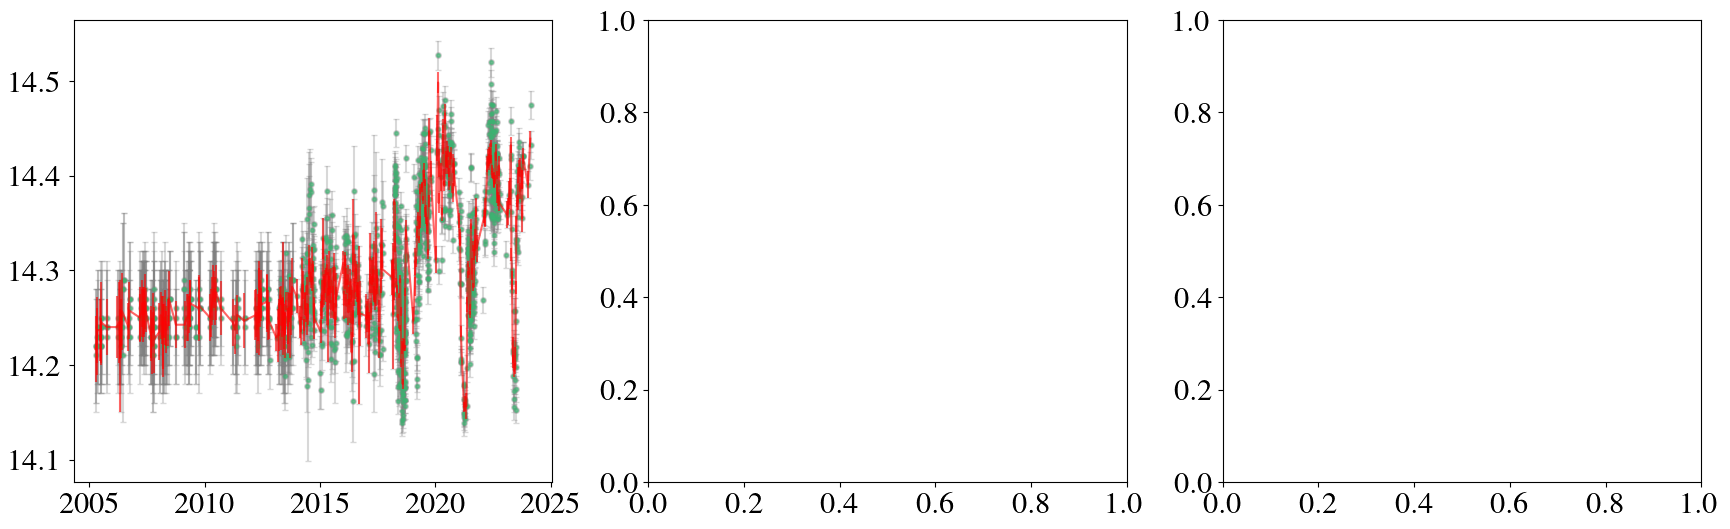

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(21,6))

ax2, ax3, ax4 = ax

ax2.errorbar(combined_obj_p['time'].to_value('decimalyear'), combined_obj_p['mag'], yerr=combined_obj_p['mag_err'], ls='none', capsize = 2, elinewidth = 1.5,  linewidth = 1.5, 
        color = 'grey', marker = 'o', mfc = 'grey', markersize = 4, markevery = 1, alpha=0.3, zorder=-1)
ax2.scatter(combined_obj_p['time'].to_value('decimalyear'), combined_obj_p['mag'], c='mediumseagreen', alpha=0.6, s=6)    
ax2.errorbar(combo_b['time'].to_value('decimalyear'), combo_b['mag'], yerr=combo_b['mag_err'], c='r', alpha=0.6, zorder=3, label='epoch size: '+ str(freq) + ' days')

combo_b_gp, log_likelihood_combo_b = GP(combo_b)

ax3.errorbar(combined_obj_p['time'].to_value('decimalyear'), combined_obj_p['mag'], yerr=combined_obj_p['mag_err'], ls='none', capsize = 2, elinewidth = 1.5,  linewidth = 1.5, 
        color = 'grey', marker = 'o', mfc = 'grey', markersize = 4, markevery = 1, alpha=0.3, zorder=-1)
ax3.scatter(combined_obj_p['time'].to_value('decimalyear'), combined_obj_p['mag'], c='mediumseagreen', alpha=0.6, s=6) 

ax3.plot(combo_b_gp['time'].to_value('decimalyear'), combo_b_gp['mag'], c='blue', label='GP log llh: '+str(np.round(log_likelihood_combo_b, 2)))
ax3.fill_between(combo_b_gp['time'].to_value('decimalyear'), combo_b_gp['mag']-combo_b_gp['mag_err'], combo_b_gp['mag']+combo_b_gp['mag_err'], color='cornflowerblue', alpha=0.4)

ax4.sharex(ax3)
ax4.errorbar(wise_obj_p['time'].to_value('decimalyear'), wise_obj_p['mag'], yerr=wise_obj_p['mag_err'], ls='none', capsize = 2, elinewidth = 1.5,  linewidth = 1.5, 
            color = 'maroon', marker = 'o', mfc = 'r', markersize = 4, markevery = 1, alpha=0.6, zorder=4)
ax4.plot(wise_gp['time'].to_value('decimalyear'), wise_gp['mag'], c='r', label='GP log llh: '+str(np.round(log_likelihood_wise, 2)))
ax4.fill_between(wise_gp['time'].to_value('decimalyear'), wise_gp['mag']-wise_gp['mag_err'], wise_gp['mag']+wise_gp['mag_err'], color='fuchsia', alpha=0.3)


In [5]:

def combine_img(plateifuv, vertically=True):
    spectra_path = "C:/Users/paiaa/Documents/Research/Blanton Lab/WISE variations/Final Plots/Images/"
    optical_lc_path = "C:/Users/paiaa/Documents/Research/Blanton Lab/Midir Variables/Figures/GP_poly3/"

    if vertically==True:
        for pifu in plateifuv:
            list_im = [spectra_path+pifu+'.png', optical_lc_path+pifu+'.png']
            imgs    = [ Image.open(i) for i in list_im ]
            # pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
            min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
            imgs_comb = np.vstack([i.resize(min_shape) for i in imgs])

            # save that beautiful picture
            imgs_comb = Image.fromarray( imgs_comb)
            imgs_comb.save(SAVE_FILEPATH+'full_image_poly/'+pifu+'.png')  
    else:
        for pifu in plateifuv:
            list_im = [spectra_path+pifu+'.png', optical_lc_path+pifu+'.png']
            imgs    = [ Image.open(i) for i in list_im ]
            # pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
            min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
            imgs_comb = np.hstack([i.resize(min_shape) for i in imgs])

            # save that beautiful picture
            imgs_comb = Image.fromarray( imgs_comb)
            imgs_comb.save(SAVE_FILEPATH+'full_image_poly/'+pifu+'.png')    


In [6]:
combine_img(plateifuv, vertically=False)